# Оптимизация моделей

Тут я попробую оптимизировать гиперпараметры моделей, поиграться с очисткой

In [18]:
import pandas as pd
import pandas_profiling as pdpp
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Optimizer
from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output

In [3]:
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
random_state = 0


In [4]:
df = pd.read_csv('data/clean.csv')
df_train, df_test = train_test_split(
    df, test_size=0.20, stratify=df['анемия'], shuffle=True, random_state=random_state)

y_train = df_train.pop('анемия')
x_train = df_train.copy()

y_test = df_test.pop('анемия')
x_test = df_test.copy()

А пока напомню лучшие результаты  
![Табличка с подчеркиваниями](https://media.githubusercontent.com/media/EmpyEmpt/Anemia-modeling/master/images/table1.jpg)

## 1. Support Vector Machines

In [ ]:
parameters = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 
    'C': [1, 10],
    'degree': [1, 3, 5, 7, 9],
    'coef0': [0, 1, 2, 3],
    }
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
GridSearchCV(estimator=SVC(), param_grid=parameters)

In [16]:
clf.best_estimator_.score(x_test, y_test)

0.8390804597701149

Я думаю тут дело не в моделе, а в данных... Тогда время их очистки!

## Очистка данных

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

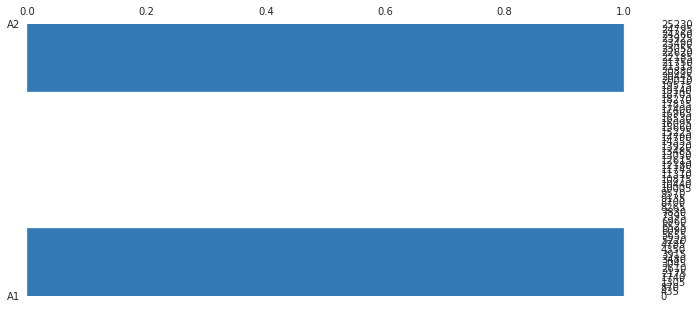

In [19]:
pdpp.ProfileReport(df)

План: убрать коррелирующие стобцы, дубликаты строк, мало уникальные стобцы

In [21]:
df = df.drop(['A20', 'A21', 'A36', 'B34', 'B37', 'B43', 'B48', 'B50', 'B56', 'B57', 'B70', 'B81'], axis = 1)

In [24]:
df = df.drop_duplicates()

In [27]:
# Между A23 и A24 убираю A23
# Между A30 и A31 убираю A30
# Между B38 и B39 убираю B38
# Медлу B44 и B45 убираю B44
df = df.drop(['A23', 'A30', 'B38', 'B44'], axis = 1)

In [ ]:
df_train, df_test = train_test_split(
    df, test_size=0.20, stratify=df['анемия'], shuffle=True, random_state=random_state)

y_train = df_train.pop('анемия')
x_train = df_train.copy()

y_test = df_test.pop('анемия')
x_test = df_test.copy()


In [28]:
svc = SVC()

svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
svc.score(x_train, y_train)
train_set = round(svc.score(x_train, y_train) * 100, 2)
train_set

83.91

И чето как-то ничего... ммм... надо подумать и посмотреть что можно тогда такого сделать...  
Фичер инженирингом и не занимался и даже не представляю что такого можно придумать для комплекта бинарных значений...  
Время доставать гугл